In [ ]:
# Useful imports
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

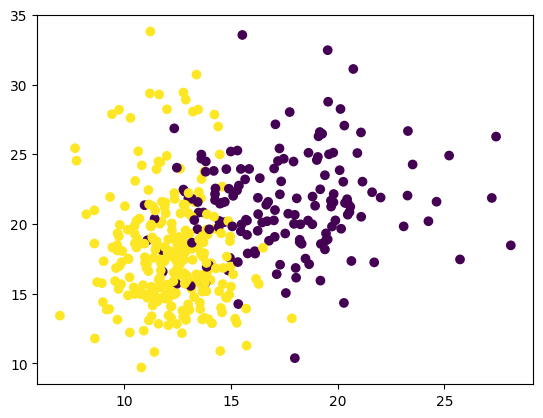

In [2]:
(X, Y) = load_breast_cancer(return_X_y=True)

(x_train, x_test, y_train, y_test) = train_test_split(X, Y, train_size=426, test_size=143, random_state=0)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation=tf.keras.activations.relu, input_shape=[30]),
    tf.keras.layers.Dense(16, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                496       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.binary_accuracy])

model.fit(x_train,y_train, epochs=500)

Epoch 1/500
14/14 [==============================] - 1s 1ms/step - loss: 46.3981 - binary_accuracy: 0.6268
Epoch 2/500
14/14 [==============================] - 0s 1ms/step - loss: 23.9517 - binary_accuracy: 0.6221
Epoch 3/500
14/14 [==============================] - 0s 1ms/step - loss: 7.5496 - binary_accuracy: 0.3122
Epoch 4/500
14/14 [==============================] - 0s 1ms/step - loss: 4.8290 - binary_accuracy: 0.2723
Epoch 5/500
14/14 [==============================] - 0s 1ms/step - loss: 3.5766 - binary_accuracy: 0.2113
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 2.9844 - binary_accuracy: 0.2324
Epoch 7/500
14/14 [==============================] - 0s 2ms/step - loss: 2.4699 - binary_accuracy: 0.2535
Epoch 8/500
14/14 [==============================] - 0s 1ms/step - loss: 2.1512 - binary_accuracy: 0.3099
Epoch 9/500
14/14 [==============================] - 0s 1ms/step - loss: 1.7636 - binary_accuracy: 0.3521
Epoch 10/500
14/14 [========================

Text(0.5, 1.0, 'Accuracy graph')

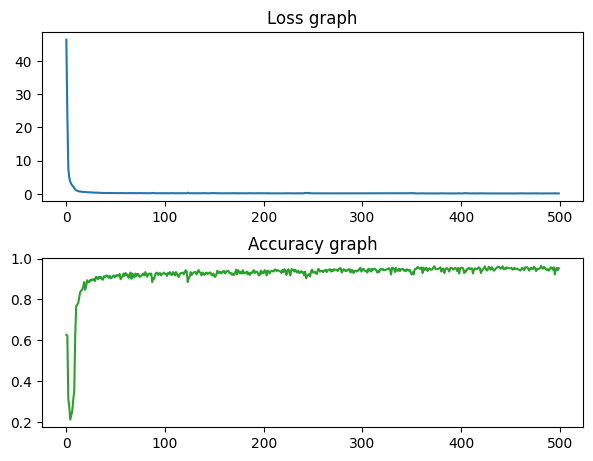

In [5]:
fig, axs = plt.subplots(2)
fig.tight_layout(pad=2)
axs[0].set_title("Loss graph")
axs[0].plot(range(500), model.history.history['loss'], 'tab:blue')
axs[1].plot(range(500), model.history.history['binary_accuracy'], 'tab:green')
axs[1].set_title("Accuracy graph")


In [6]:
#Make predictions
predictions = model.predict(x_test)

predictions_class = np.where(predictions[:, 0] >= 0.5, 1, 0)
predictions_class == y_test


5/5 [==============================] - 0s 1ms/step


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [7]:
tf.keras.metrics.binary_accuracy(y_test, predictions_class)

<tf.Tensor: shape=(), dtype=float32, numpy=0.951049>